In [1]:

from uerl.components.rewarders.pickup_rewarder import PickupRewarderConfig
from uerl.renderer import EpisodeRendererConfig, RendererViewConfig
from uerl.ue_gym_env import UEEnvMultiAgent
from uerl.configs import UELaunchSettings, UEEnvConfig
from uerl.components.sensors.camera_sensor import CameraSensorConfig
from uerl.components.actuators.robot_actuator import RobotMovementActuatorConfig
from uerl.components.rewarders.world_direction_rewarder import WorldDirectionRewarderConfig
from uerl.components.terminators.step_counter_terminator import StepCounterTerminatorConfig
from uerl.components.terminators.actors_of_class_finished_terminator import ActorsOfClassFinishedTerminatorConfig
from uerl.components.infos.camera_spectator_info import SpectatorCameraConfig
from uerl.agent.agent_base import AgentConfig, UEAgent
from uerl.types import RenderType

import gymnasium
import numpy as np
from typing import Dict, Any

class RobotAgent(UEAgent):
    def combine_processed_observations(self, observations: Dict[str, Any]) -> Any:
        return observations




camera_cpu_conf = CameraSensorConfig(name="camera_cpu",
                                 attach_to_comp_name="CameraComp",
                                 fov=70,
                                 width=512,
                                 height=512,
                                 use_gpu=True,
                                 grayscale=False)


spectator_camera_cpu_conf = SpectatorCameraConfig(name="spectator_camera_cpu",
                                 attach_to_comp_name="",
                                 attach_to_actor_name="SpecCameraActor",
                                 width=512,
                                 height=512,
                                 fov=70,
                                 use_gpu=True,
                                 grayscale=False)


actuator_conf = RobotMovementActuatorConfig(name="my_robot_actuator")
rewarder_pickup_conf = PickupRewarderConfig(name="apples_reward")
terminator_conf = StepCounterTerminatorConfig(name="my_step_terminator",
                                              max_step_count=1000)
apples_collected_terminator = ActorsOfClassFinishedTerminatorConfig(name="apples_collected_terminator",
                                            actors_class_to_check='/CollectApples/Blueprints/BP_AppleReward.BP_AppleReward_C')

agent_obs_space = gymnasium.spaces.Box(low=0.0,
                                 high=255.0,
                                 shape=(512, 512, 3),
                                 dtype=np.uint8)
agent_action_space = gymnasium.spaces.MultiDiscrete([2, 2, 2, 2, 2])
agent_conf = AgentConfig(
    "Agent1", RobotAgent,
    "/CybertoothML/Agents/RobotAgent/BP_RobotAgent.BP_RobotAgent_C", "Agent1",
    agent_obs_space, agent_action_space, [camera_cpu_conf], [actuator_conf],
    [rewarder_pickup_conf], [terminator_conf], [spectator_camera_cpu_conf])

launch_settings = UELaunchSettings(map_name="CollectApplesMap", 
                                   output_ue_log=True,
                                   render_type=RenderType.GPU_OFF_SCREEN,
                                   #specific_ip_port=("192.168.1.200", 33333)
                                   executable_path="../games/collect_apples/Linux/RLExamples.sh"
                                   )

ue_conf = UEEnvConfig(launch_settings, [agent_conf], None)


In [2]:
ue_conf.get_ue_human_mode_command()

'ML.HumanStart {"launch_settings": {"map_name": "CollectApplesMap", "no_sound": true, "run_name": "run_name_not_set", "tickfps": 20, "specific_ip_port": ["", -1], "window_res_x": 320, "window_res_y": 240, "executable_path": "/mnt/projects/uerl/games/collect_apples3/Linux/PackageTestProject.sh", "output_ue_log": true}, "agent_configs": [{"agent_id": "Agent1", "agent_ue_class": "/CybertoothML/Agents/RobotAgent/BP_RobotAgent.BP_RobotAgent_C", "spawn_point_name": "Agent1", "sensor_configs": [{"name": "camera_cpu", "ue_class_name": "camera", "attach_to_comp_name": "CameraComp", "attach_to_actor_name": "", "width": 512, "height": 512, "max_distance": 15000.0, "fov": 70, "use_gpu": true, "grayscale": false, "render_owner": true, "srgb": false, "frame_stack_size": 1, "normalise": false}], "actuator_configs": [{"name": "my_robot_actuator", "ue_class_name": "robot_movement"}], "rewarder_configs": [{"name": "apples_reward", "ue_class_name": "pickup_reward"}], "terminator_configs": [{"name": "my_s

In [3]:
env = UEEnvMultiAgent({"ue_conf": ue_conf})

2024-12-28 16:41:15,563 - uerl.ue_gym_env_2 - INFO - UEEnvMultiAgent.__init__
2024-12-28 16:41:15,564 - uerl.ue_gym_env_2 - INFO - Starting UE5 environment
2024-12-28 16:41:15,564 - uerl.ue_gym_env_2 - INFO - Connecting to the environment. Retrying... (0/5)


Launching UnrealEngine instance with commandline:
	 /mnt/projects/uerl/games/collect_apples3/Linux/PackageTestProject.sh -unattended -nosound -ws_port 59039 -RenderOffscreen -WINDOWED -ResX=320 -ResY=240
Shutdown handler: initialize.
- Existing per-process limit (soft=1048576, hard=1048576) is enough for us (need only 1048576)
Increasing per-process limit of core file size to infinity.
LogCore: Display: UTS: The Unreal Trace Server binary is not available ('../../../Engine/Binaries/Linux/UnrealTraceServer')
LogTrace: Initializing trace...
LogTrace: Finished trace initialization.
LogCsvProfiler: Display: Metadata set : platform="Linux"
LogCsvProfiler: Display: Metadata set : config="Development"
LogCsvProfiler: Display: Metadata set : buildversion="UE5-CL-0"
LogCsvProfiler: Display: Metadata set : engineversion="5.5.1-0+UE5"
LogCsvProfiler: Display: Metadata set : os="Ubuntu 22.04.3 LTS 5.15.0-127-generic"
LogCsvProfiler: Display: Metadata set : cpu="AuthenticAMD|QEMU Virtual CPU versio

2024-12-28 16:41:20,567 - uerl.ue_gym_env_2 - INFO - connecting to ws://localhost:59039
2024-12-28 16:41:20,568 - uerl.ue_gym_env_2 - INFO - connecting to ws://localhost:59039 attempt 0


[2024.12.28-16.41.20:717][  0]LogSlate: SlateFontServices - WITH_FREETYPE: 1, WITH_HARFBUZZ: 1
[2024.12.28-16.41.20:822][  0]LogShaderLibrary: Display: Using ../../../PackageTestProject/Content/ShaderArchive-PackageTestProject-SF_VULKAN_SM5-VULKAN_SM5.ushaderbytecode for material shader code. Total 2406 unique shaders.
[2024.12.28-16.41.20:822][  0]LogShaderLibrary: Display: Cooked Context: Using Shared Shader Library PackageTestProject
[2024.12.28-16.41.20:822][  0]LogShaderLibrary: Display: Logical shader library 'PackageTestProject' has been created as a monolithic library
[2024.12.28-16.41.20:822][  0]LogInit: Using OS detected language (en-GB).
[2024.12.28-16.41.20:822][  0]LogInit: Using OS detected locale (en-GB).
[2024.12.28-16.41.20:827][  0]LogTextLocalizationManager: No localization for 'en-GB' exists, so 'en' will be used for the language.
[2024.12.28-16.41.20:827][  0]LogTextLocalizationManager: No localization for 'en-GB' exists, so 'en' will be used for the locale.
[2024

2024-12-28 16:41:25,568 - uerl.ue_gym_env_2 - INFO - connecting to ws://localhost:59039 attempt 1


[2024.12.28-16.41.25:571][  0]LogTemp: Warning: *********** INIT STEPS v3


2024-12-28 16:41:25,869 - uerl.ue_gym_env_2 - INFO - UE5 environment started at localhost:59039


[2024.12.28-16.41.25:868][  0]LogTemp: Warning: GetInfoProviderClass called with InfoProviderName: spectator_camera
[2024.12.28-16.41.25:868][  0]LogTemp: Warning: Class found for InfoProviderName: spectator_camera
[2024.12.28-16.41.25:868][  0]LogTemp: Checking actor: ChaosDebugDrawActor
[2024.12.28-16.41.25:868][  0]LogTemp: Checking actor: SM_SkySphere
[2024.12.28-16.41.25:868][  0]LogTemp: Checking actor: SM_Cube2
[2024.12.28-16.41.25:868][  0]LogTemp: Checking actor: SM_Cube3
[2024.12.28-16.41.25:868][  0]LogTemp: Checking actor: SM_Cube4
[2024.12.28-16.41.25:868][  0]LogTemp: Checking actor: SM_Cube5
[2024.12.28-16.41.25:868][  0]LogTemp: Checking actor: Cube
[2024.12.28-16.41.25:868][  0]LogTemp: Checking actor: SpecCameraActor
[2024.12.28-16.41.25:868][  0]LogTemp: Found actor with matching name: SpecCameraActor


In [7]:
obs, info = env.reset()

Starting recording episode 2024-12-28_16-41-36_dk6ni


In [8]:
from uerl.utils import display_image_in_jupyter

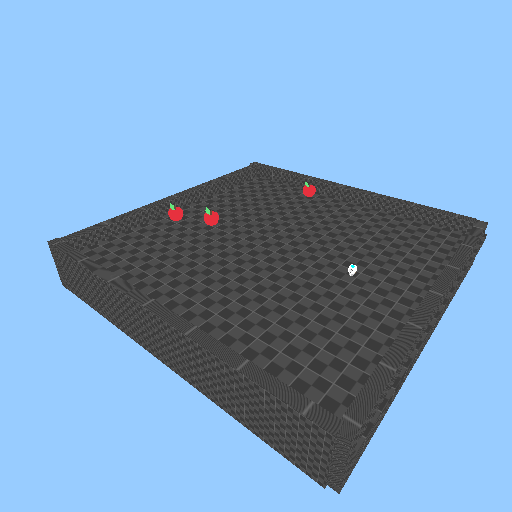

In [15]:
display_image_in_jupyter(info["Agent1"]["spectator_camera_cpu"], target_size=(512,512))

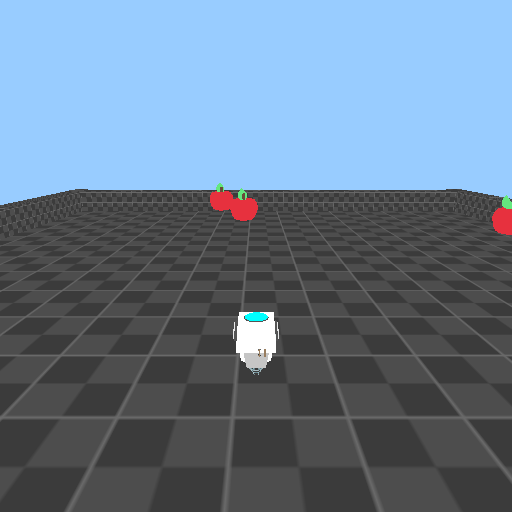

In [16]:
display_image_in_jupyter(obs["Agent1"]["camera_cpu"], target_size=(512,512))

In [14]:
from collections import OrderedDict
from IPython.display import display, clear_output
import time
import numpy as np

step_count = 0

obs, info = env.reset()


action = OrderedDict([('Agent1', np.array([0, 0, 1, 0, 0], dtype=np.int64))])
for i in range(10):
    step_count += 1
    time.sleep(0.0)
    #clear_output(wait=True)
    obs, rewards, terminate, truncated, infos = env.step(action)
    #display_image_in_jupyter(obs["Agent1"]["camera_cpu"], target_size=(512,512))
    if terminate["__all__"] or truncated["__all__"]:
        print(step_count)
        break

Starting recording episode 2024-12-28_16-42-35_m6065


In [ ]:
env.close()